# Sandbox for testing purposes

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.linalg import block_diag

from cereeberus import EmbeddedGraph, ReebGraph
import cereeberus.data.ex_mappergraphs as ex_mg
# from cereeberus.data.ex_mergetrees import randomMergeTree

from cereeberus.distance.interleave import Interleave
from cereeberus.distance.labeled_blocks import LabeledBlockMatrix as LBM 
from cereeberus.distance.labeled_blocks import LabeledMatrix as LM

In [2]:
T = ex_mg.torus(0, 1, 9, 10, delta = 1, seed = 17)
L = ex_mg.line(0, 9)

myInt = Interleave(L,T, initialize_random_maps = True, seed = 0)

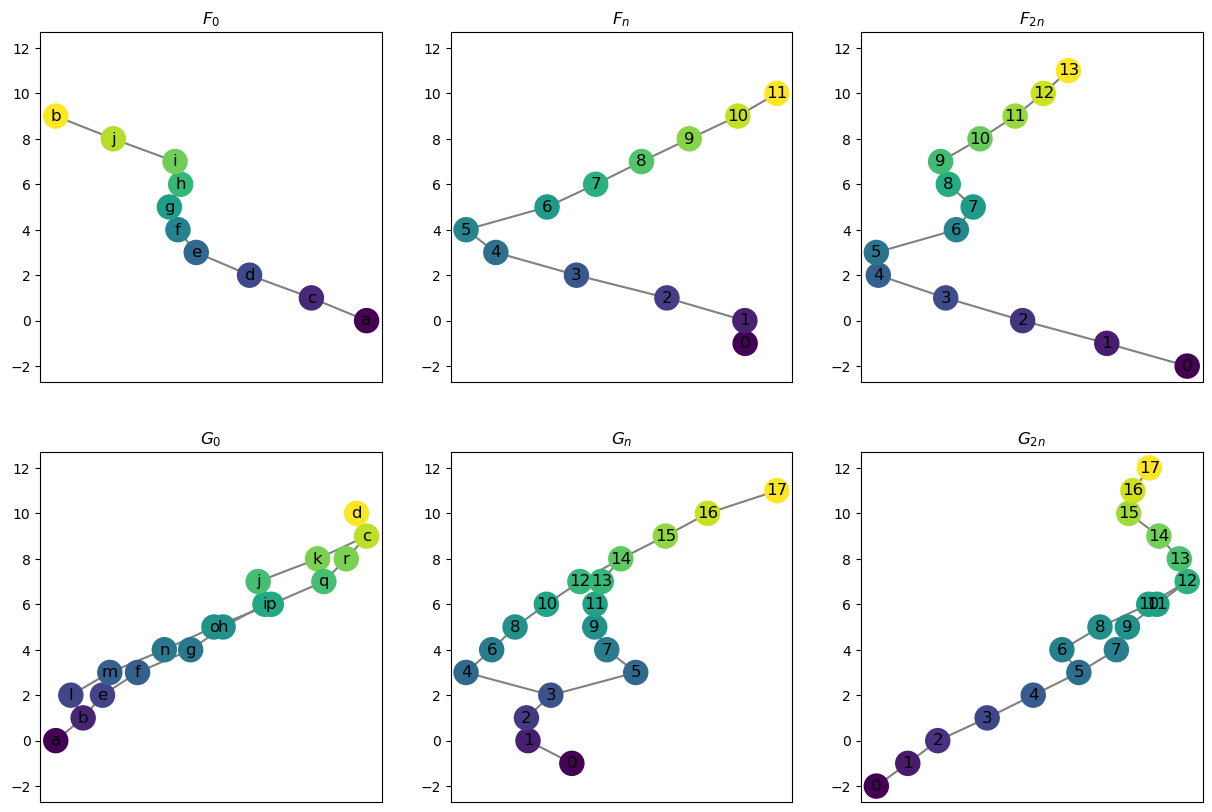

In [3]:
myInt.draw_all_graphs()

In [4]:
myInt.loss_by_block()

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 1.0,
 4: 2.0,
 5: 3.0,
 6: 1.0,
 7: 1.0,
 8: 0.0,
 9: 0.0,
 10: 0.0}

LabeledMatrix(
array=
[[0.]], 
rows=[7], 
cols=['g'])

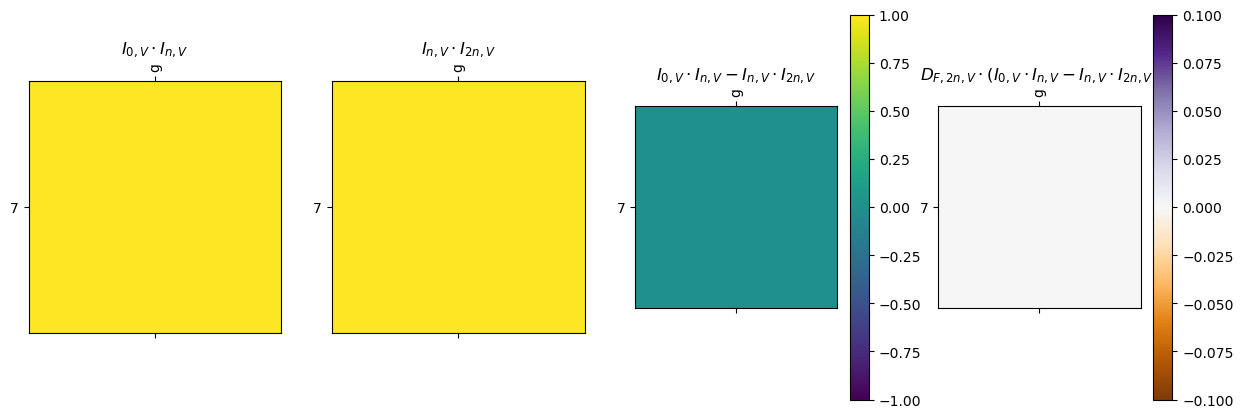

In [5]:
myInt.triangle(func_val = 5,  draw=True)

In [6]:


Graph = myInt.G 
graph_name = 'G' 
key = '0' 

for funcval in myInt.val_to_edges[graph_name][key].keys():
    print(f"Key: {funcval}")
    print(f"Node map: {myInt.val_to_edges[graph_name][key][funcval]}")


Key: 0
Node map: [('a', 'b', 0)]
Key: 1
Node map: [('b', 'e', 0), ('b', 'l', 0)]
Key: 9
Node map: [('c', 'd', 0)]
Key: 2
Node map: [('e', 'f', 0), ('l', 'm', 0)]
Key: 3
Node map: [('f', 'g', 0), ('m', 'n', 0)]
Key: 4
Node map: [('g', 'h', 0), ('n', 'o', 0)]
Key: 5
Node map: [('h', 'i', 0), ('o', 'p', 0)]
Key: 6
Node map: [('i', 'j', 0), ('p', 'q', 0)]
Key: 7
Node map: [('j', 'k', 0), ('q', 'r', 0)]
Key: 8
Node map: [('k', 'c', 0), ('r', 'c', 0)]


In [7]:

rows = Graph(key).sorted_vertices()
cols = Graph(key).sorted_edges()

B_down = LBM()
B_up = LBM()

for i in myInt.val_to_verts[graph_name][key]:
    if i in myInt.val_to_edges[graph_name][key]:
        edges = myInt.val_to_edges[graph_name][key][i]
        verts_down = myInt.val_to_verts[graph_name][key][i]
        verts_up = myInt.val_to_verts[graph_name][key][i+1]
        B_down[i] = LM(rows = verts_down, cols = edges)
        B_up[i] = LM(rows = verts_up, cols = edges)

        for e in edges:
            B_down[i][e[0],e] = 1
            B_up[i][e[1],e] = 1

min_i = min(list(myInt.val_to_verts[graph_name][key].keys()))
max_i = max(list(myInt.val_to_verts[graph_name][key].keys()))

min_verts = myInt.val_to_verts[graph_name][key][min_i]
max_verts = myInt.val_to_verts[graph_name][key][max_i]


B_up[min_i-1] = LM(rows = min_verts, cols = [])
B_down[max_i] = LM(rows = max_verts, cols = [])


In [8]:
B_down.to_shifted_blocks(-1).blocks.keys()

dict_keys([-1, 0, 8, 1, 2, 3, 4, 5, 6, 7, 9])

In [9]:
B_up.blocks.keys()

dict_keys([0, 1, 9, 2, 3, 4, 5, 6, 7, 8, -1])

In [10]:
B_down.to_labeled_matrix() + B_up.to_labeled_matrix()

LabeledMatrix(
array=
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0

In [11]:
type(B_up)

cereeberus.distance.labeled_blocks.LabeledBlockMatrix

In [12]:
# funcs = list(B_up.blocks.keys())
# funcs.sort()
# for i in funcs:
#     print(f"\nB_up[{i}]: {B_up[i]}")

B_up.to_labeled_matrix()

LabeledMatrix(
array=
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
{'a': 0, 'b': 1, 'c': 9, 'd': 10, 'e': 2, 'f': 3, 'g': 4, 'h': 5, 'i': 6, 'j': 7, 'k': 8, 'l': 2, 'm': 3, 'n': 4, 'o': 5, 'p': 6, 'q': 7, 'r': 8}


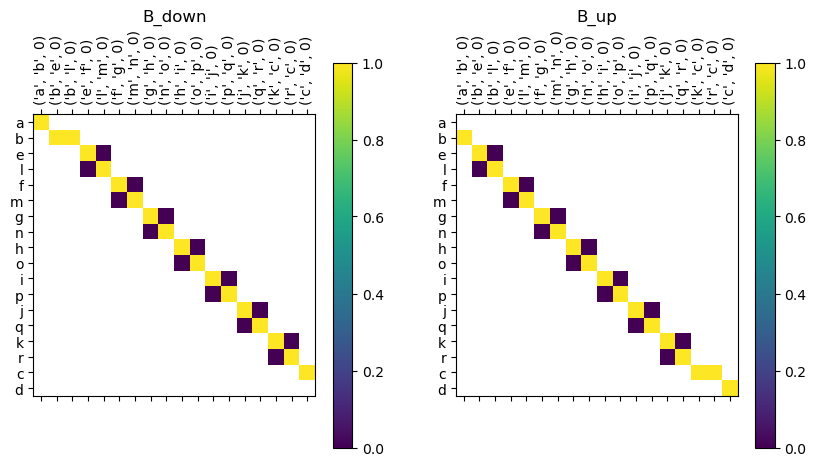

In [13]:

fig, ax = plt.subplots(1,2, figsize = (10,5))
B_down.draw(filltype='nan', ax = ax[0], colorbar=True)
ax[0].set_title('B_down')
B_up.draw(filltype='nan', ax = ax[1], colorbar=True)
ax[1].set_title('B_up')


# B_down.to_labeled_matrix() + B_up.to_labeled_matrix()

print(Graph(key).f)
